In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
zip_path = "/content/widsdatathon2025.zip"
extract_to = "/content/btt_files/"

# Create extraction directory
os.makedirs(extract_to, exist_ok=True)

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# List extracted files
os.listdir(extract_to)


['SAMPLE_SUBMISSION.xlsx', 'TRAIN', 'Data Dictionary.xlsx', 'TEST']

In [33]:
# Find all Excel files in the extracted folder
excel_files = [f for f in os.listdir(extract_to) if f.endswith(".xlsx")]

# Display the found files
print("Found Excel files:", excel_files)

Found Excel files: ['SAMPLE_SUBMISSION.xlsx', 'Data Dictionary.xlsx']


In [34]:

train_folder = os.path.join(extract_to, "TRAIN")
test_folder = os.path.join(extract_to, "TEST")

# List files in TRAIN and TEST folders
print("Train Files:", os.listdir(train_folder))
print("Test Files:", os.listdir(test_folder))


Train Files: ['TRAIN_CATEGORICAL_METADATA.xlsx', 'TRAIN_QUANTITATIVE_METADATA.xlsx', 'TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv', 'TRAINING_SOLUTIONS.xlsx']
Test Files: ['TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv', 'TEST_CATEGORICAL.xlsx', 'TEST_QUANTITATIVE_METADATA.xlsx']


In [35]:
train_files = [f for f in os.listdir(train_folder) if f.endswith(".xlsx")]

if train_files:
    train_data_path = os.path.join(train_folder, train_files[0])
    df_train = pd.read_excel(train_data_path)

    print(f"Loaded Training File: {train_files[0]}")
    df_train.info()
    display(df_train.head())
else:
    print("No Excel files found in TRAIN.")


Loaded Training File: TRAIN_CATEGORICAL_METADATA.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [36]:
test_files = [f for f in os.listdir(test_folder) if f.endswith(".xlsx")]

if test_files:
    test_data_path = os.path.join(test_folder, test_files[0])
    df_test = pd.read_excel(test_data_path)

    print(f"Loaded Test File: {test_files[0]}")
    df_test.info()
    display(df_test.head())
else:
    print("No Excel files found in TEST.")


Loaded Test File: TEST_CATEGORICAL.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [37]:
dict_path = os.path.join(extract_to, "Data Dictionary.xlsx")
df_dict = pd.read_excel(dict_path)

display(df_dict)


,DataType,Instrument,Field,Description,Type,Labels
0,QUANTITATIVE METADATA,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN
2,Quantitative,Edinburgh Handedness Questionnaire,EHQ_EHQ_Total,Laterality Index (Score),float,-100 = 10th left\n−28 ≤ LI < 48 = middle\n100 ...
3,Quantitative,Ishihara Color Vision Test,ColorVision_CV_Score,Color vision test score,int,NaN
4,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_CP,Corporal Punishment Score,int,NaN
5,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_ID,Inconsistent Discipline Score,int,NaN
6,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_INV,Involvement Score,int,NaN
7,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_OPD,Other Discipline Practices Score (Not factored...,int,NaN
8,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PM,Poor Monitoring/Supervision Score,int,NaN
9,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PP,Positive Parenting Score,int,NaN


In [38]:
print("Missing values in Training Data:")
print(df_train.isnull().sum())

print("\nMissing values in Test Data:")
print(df_test.isnull().sum())


Missing values in Training Data:
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

Missing values in Test Data:
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity     3
PreInt_Demos_Fam_Child_Race          6
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               1
Barratt_Barratt_P1_Occ               1
Barratt_Barratt_P2_Edu              36
Barratt_Barratt_P2_Occ              42
dtype: int64


In [39]:
print("Duplicate rows in Training Data:", df_train.duplicated().sum())
print("Duplicate rows in Test Data:", df_test.duplicated().sum())


Duplicate rows in Training Data: 0
Duplicate rows in Test Data: 0


In [40]:
print(df_train.dtypes)
print(df_test.dtypes)


participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race           int64
MRI_Track_Scan_Location               int64
Barratt_Barratt_P1_Edu                int64
Barratt_Barratt_P1_Occ                int64
Barratt_Barratt_P2_Edu                int64
Barratt_Barratt_P2_Occ                int64
dtype: object
participant_id                       object
Basic_Demos_Enroll_Year               int64
Basic_Demos_Study_Site                int64
PreInt_Demos_Fam_Child_Ethnicity    float64
PreInt_Demos_Fam_Child_Race         float64
MRI_Track_Scan_Location               int64
Barratt_Barratt_P1_Edu              float64
Barratt_Barratt_P1_Occ              float64
Barratt_Barratt_P2_Edu              float64
Barratt_Barratt_P2_Occ              float64
dtype: object


In [41]:
print(df_train.info())
print(df_test.info())

print("Remaining missing values in Train:", df_train.isnull().sum().sum())
print("Remaining missing values in Test:", df_test.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 3

In [42]:
df_train.to_csv("/cleaned_train.csv", index=False)
df_test.to_csv("/cleaned_test.csv", index=False)

In [43]:
print(df_train.columns)  # Identify the target column from the list


Index(['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')


In [44]:
# Load cleaned train data
train_path = "/cleaned_test.csv"
df_train = pd.read_csv(train_path)

# Load cleaned test data
test_path = "/cleaned_test.csv"
df_test = pd.read_csv(test_path)

# Display info
print("Train Data Info:")
df_train.info()
display(df_train.head())

print("\nTest Data Info:")
df_test.info()
display(df_test.head())



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0



Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,Cfwaf5FX7jWK,2022,4,0.0,0.0,4,21.0,30.0,18.0,30.0
1,vhGrzmvA3Hjq,2023,4,0.0,0.0,4,21.0,45.0,NaN,30.0
2,ULliyEXjy4OV,2022,4,0.0,0.0,4,21.0,40.0,18.0,40.0
3,LZfeAb1xMtql,2022,4,0.0,0.0,3,21.0,45.0,21.0,45.0
4,EnFOUv0YK1RG,2022,4,2.0,0.0,4,18.0,0.0,21.0,45.0


In [45]:
dict_path = "/content/btt_files/Data Dictionary.xlsx"
df_dict = pd.read_excel(dict_path)

display(df_dict)


,DataType,Instrument,Field,Description,Type,Labels
0,QUANTITATIVE METADATA,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN
2,Quantitative,Edinburgh Handedness Questionnaire,EHQ_EHQ_Total,Laterality Index (Score),float,-100 = 10th left\n−28 ≤ LI < 48 = middle\n100 ...
3,Quantitative,Ishihara Color Vision Test,ColorVision_CV_Score,Color vision test score,int,NaN
4,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_CP,Corporal Punishment Score,int,NaN
5,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_ID,Inconsistent Discipline Score,int,NaN
6,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_INV,Involvement Score,int,NaN
7,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_OPD,Other Discipline Practices Score (Not factored...,int,NaN
8,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PM,Poor Monitoring/Supervision Score,int,NaN
9,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PP,Positive Parenting Score,int,NaN


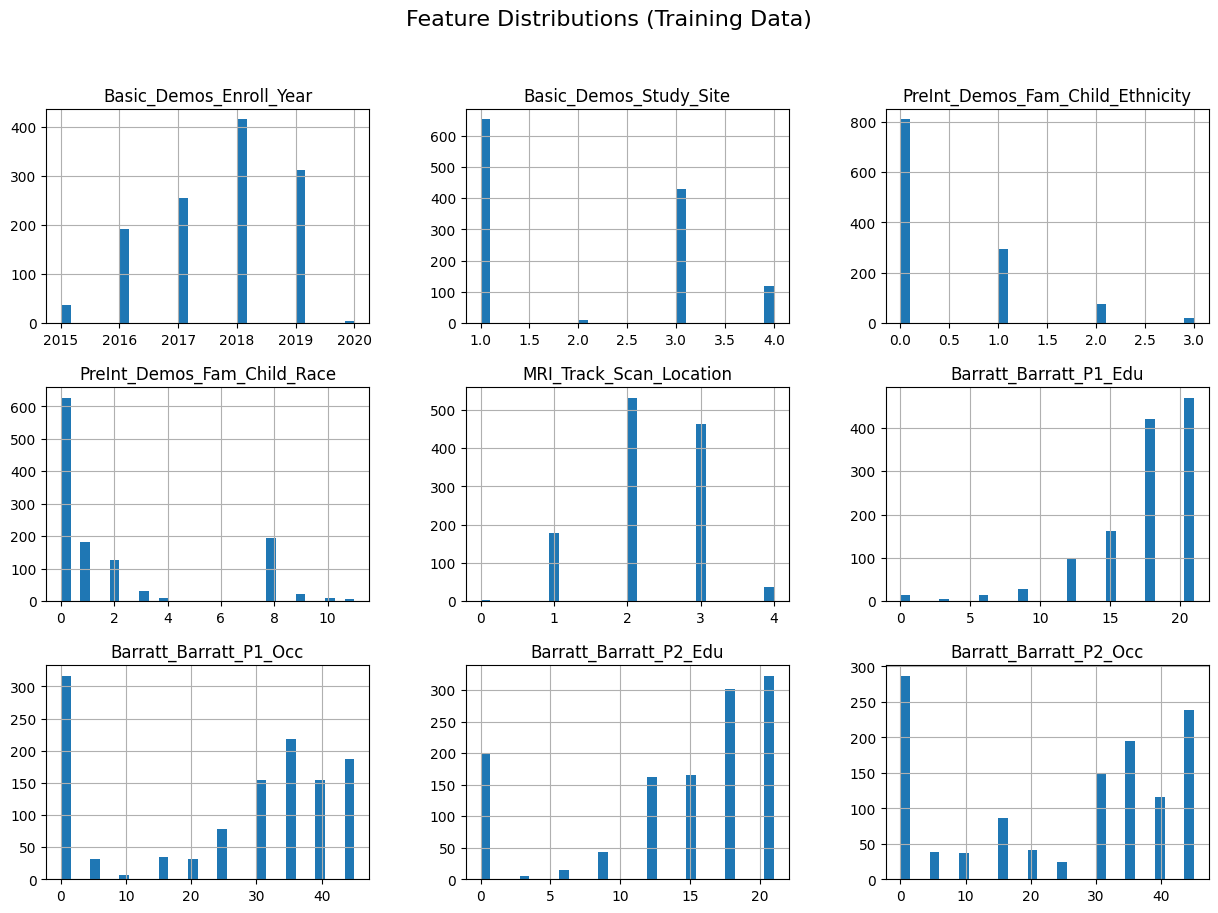

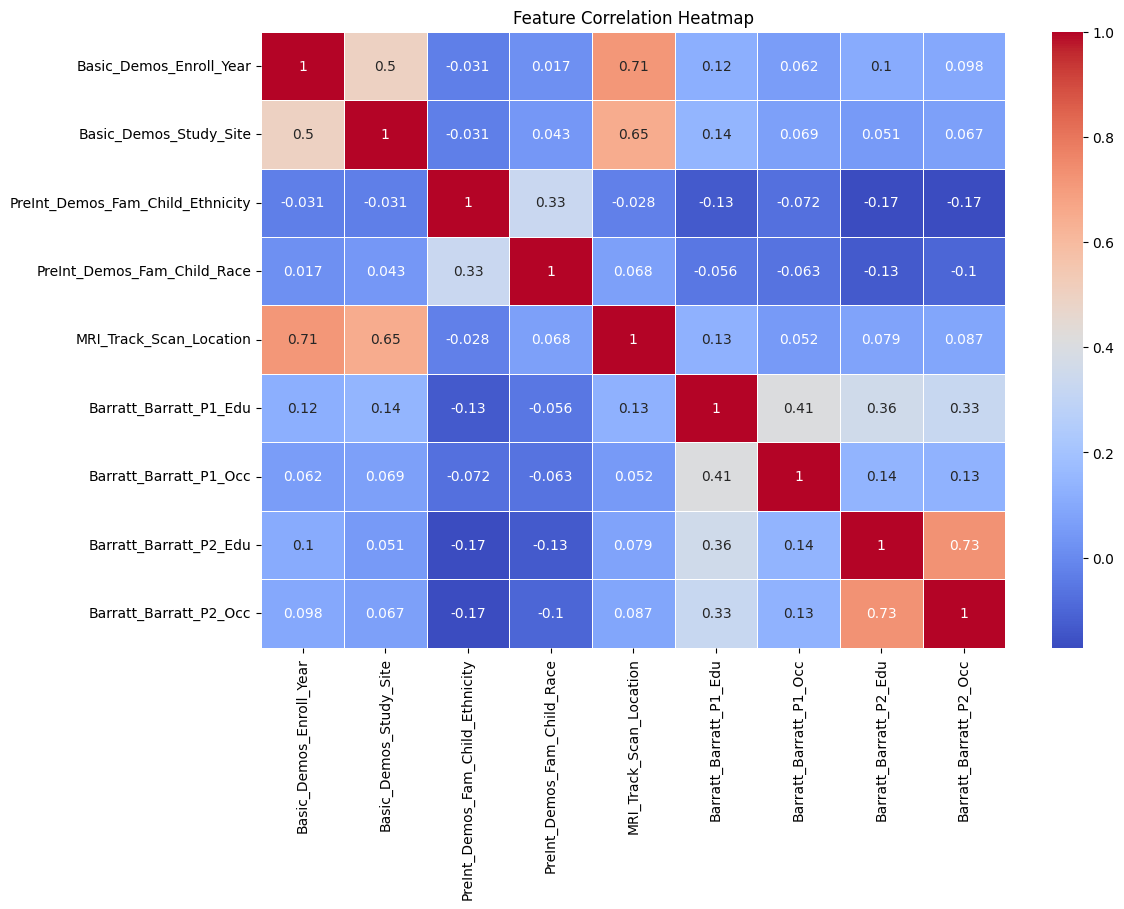

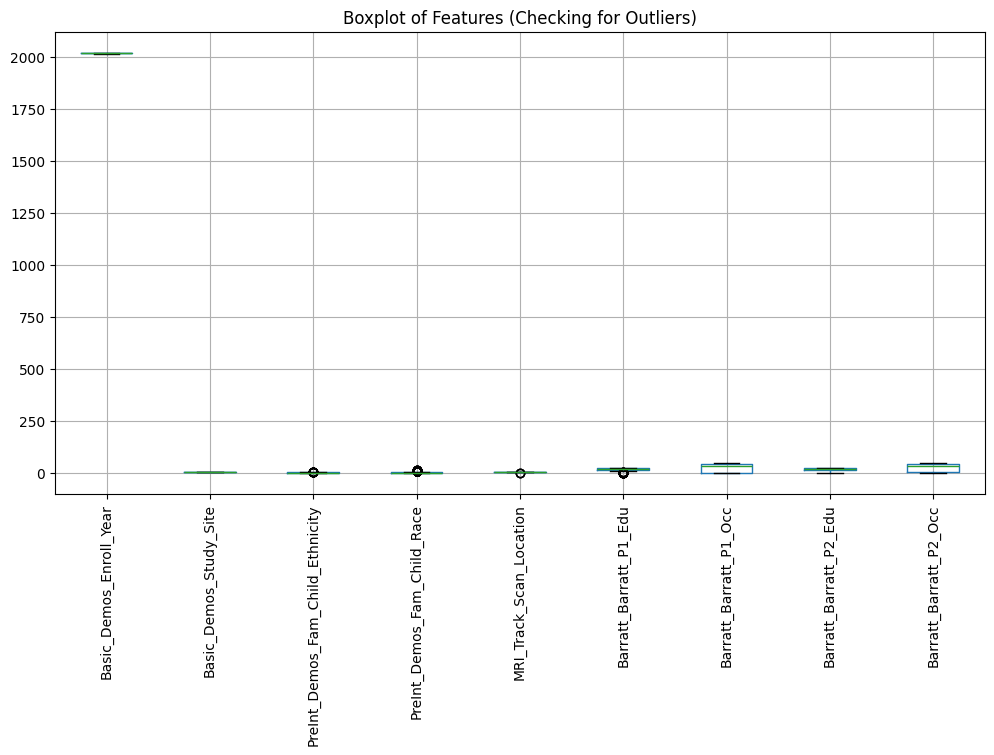

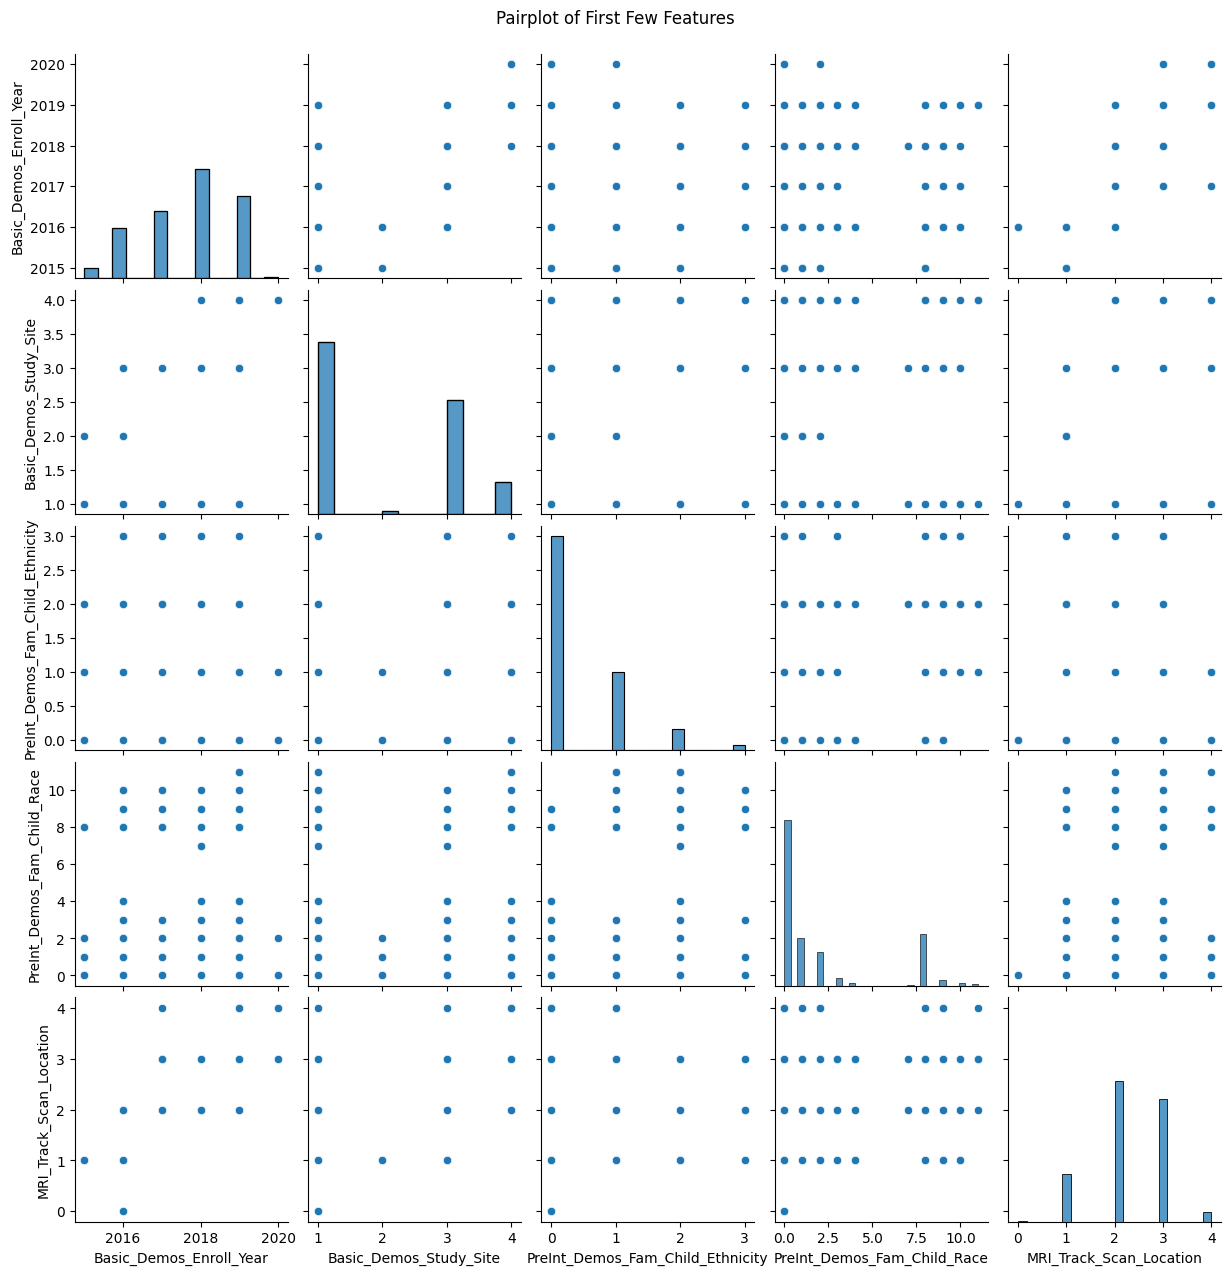

In [49]:
# Load cleaned train and test data
train_path = "/cleaned_train.csv"
test_path = "/cleaned_test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Drop participant_id
if "participant_id" in df_train.columns:
    df_train = df_train.drop(columns=["participant_id"])
if "participant_id" in df_test.columns:
    df_test = df_test.drop(columns=["participant_id"])

# Set figure size for all plots
plt.rcParams["figure.figsize"] = (12, 6)

# 1️⃣ Distribution of Numeric Features
df_train.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions (Training Data)", fontsize=16)
plt.show()

# 2️⃣ Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3️⃣ Boxplots to Check for Outliers
plt.figure(figsize=(12, 6))
df_train.boxplot(rot=90)
plt.title("Boxplot of Features (Checking for Outliers)")
plt.show()

# 4️⃣ Pairplot for Relationship Analysis (Limited to First 5 Columns for Readability)
sns.pairplot(df_train.iloc[:, :5])
plt.suptitle("Pairplot of First Few Features", y=1.02)
plt.show()

# 5️⃣ Target Variable Distribution (if numerical)
target_col = "MRI_Track_Age_at_Scan"  # Replace if needed
if target_col in df_train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[target_col], bins=30, kde=True)
    plt.title(f"Distribution of {target_col}")
    plt.xlabel(target_col)
    plt.ylabel("Frequency")
    plt.show()

# 6️⃣ Feature vs Target Relationship (if numerical target)
if target_col in df_train.columns:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    for i, column in enumerate(df_train.columns[:6]):  # Limit to first 6 features
        if column != target_col:
            sns.scatterplot(x=df_train[column], y=df_train[target_col], ax=axes[i])
            axes[i].set_title(f"{column} vs {target_col}")
    plt.tight_layout()
    plt.show()
